# PROJECT : BOSTON HOUSE PRICE PREDICTION

In [1]:
''' Importing necessary libraries'''
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import visuals as vs
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
import matplotlib as plt
df=pd.read_csv('housing.csv') # Loading the dataset into dataframe 'df'
prices=df['MEDV'] # Copying the MEDV column into seperate dataframe for easier calculations
features=df.drop('MEDV', axis = 1) # Mainiting features columns in a seperate dataframe

### GLANCE ON DATA

In [76]:
df.head()

RM  LSTAT  PTRATIO    MEDV
0  6.575   4.98     15.3  504000
1  6.421   9.14     17.8  453600
2  7.185   4.03     17.8  728700
3  6.998   2.94     18.7  701400
4  7.147   5.33     18.7  760200

### Information of the data

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null int64
dtypes: float64(3), int64(1)
memory usage: 15.4 KB


# Calculating the descriptive Statistics

In [2]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000
Maximum price: $1024800
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


# Feature Observations :
### 1.Would you expect a home that has an 'RM' value(number of rooms) of 6 be worth                more or less than a home that has an 'RM' value of 7?

#### Ans : The 'RM' parameter is directly proportional to the price. The house  with more number of rooms can          be more flexible and can fit many people.The houses with more rooms will have extra space for                                  including more furniture and other things.Hence , the home with 'RM' value 7 is more worthy

### 2.Would you expect a neighborhood that has an 'LSTAT' value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an 'LSTAT' value of 20?

#### Ans : The 'LSTAT' parameter plays in opposite manner . 'LSTAT' parameter is inversely proportional to the price. It can justified that lower class people can't afford luxuries and comfort and will always opt the cheaper material and choices . The cost of living will be less . Hence, the higher the LSTAT value , the lesser the price of the houses

### 3.Would you expect a neighborhood that has an 'PTRATIO' value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an 'PTRATIO' value of 15?

#### Ans : The 'PTRATIO' parameter is inversely proportional to the price of the houses . The high PTRATIO  indicates that there is scarcity for schools because of the shortage of funds or money. The lesser the number of schools , the more will be uneducated and undeveloped society . And this fact can say that the people who live there will lead a simple live with less cost of living . Hence , the higher the 'PTRATIO' , the lesser the worth of the houses.

In [35]:
''' DEFINING  A PERFORMANCE  METRIC & CALCULATING THE r2_score '''
''' This function returns the r2_score'''

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)  
    
    # Return the score
    return score

### Calculating the performance of Model

In [79]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


### Would you consider this model to have successfully captured the variation of the target variable? Why or why not?
#### --- r2_score = 92.3%
#### ---- I would consider this model to have successfully captured the variation of the target variable.
#### ---- This can be justified by the fact that , the higher the r2_score the greater will be the chances of capturing the target variable .                Since , the r2_score is almost near to 1 (0.923) . We can consider this as good model.  





### Shuffling and Splitting the data

In [80]:
'''Shuffling and splitting the dataset'''

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=0)

# Success
print("Training and testing split was successful.")


Training and testing split was successful.


### What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?
### ---We should never use the testing data for training or vice-versa . If we use the same data for both testing and training the results will be worst .It can be underfitting or overfitting. The testing data and the training data must be independent and should be different sets



### Learning Curves

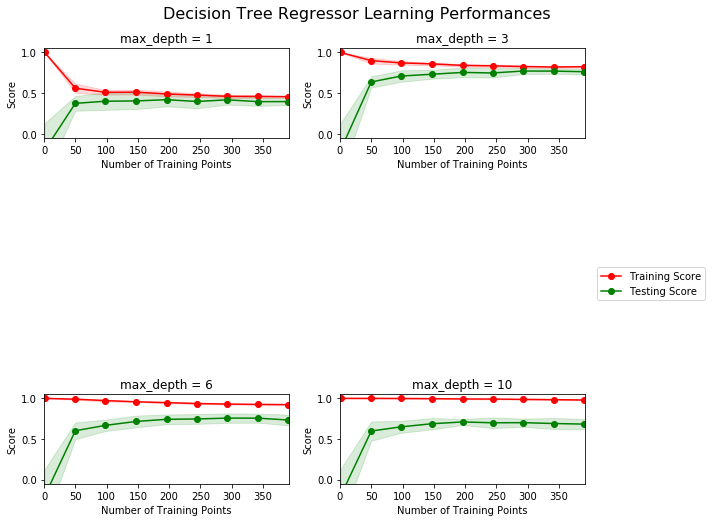

In [41]:
vs.ModelLearning(features, prices)

### Case 1 : max_depth = 1
#### --- The testing scores increases with number of data points
#### --- The testing scores seems to be constant at 0.4 which indicates poor performance in predicting unknwon values
#### --- The training scores decreases with increase in number of data points.
#### --- This model does not provide a better results
#### --- It suffers from High bias which is said to be underfitting or over simplifying
#### --- The testing score curve has almost become like a  Plateau which indicates that there will not be an improvement.

### Case 2 : max_depth = 3
#### --- The testing score seems to have increased upto 0.8
#### --- There is slight decrease in the training scores with increase in the data points
#### --- This model is said to be "Just right" or Normal or Ideal model
#### --- This model Generalises the data well and success rate of predicting the unseen data is more

### Case 3 : max_depth = 6
#### --- The Testing scores seems to have reached to 0.7 or 0.75
#### --- The training scores reached to 0.9
#### --- It suffers from a slight high variance
#### --- Though it has slight high variance , it does not generalises the data well

### Case 4 : max_depth =10
#### --- The testing scores reached upto 0.7
#### --- The trainings hardly decreased 
#### --- This model suffers from high variance
#### --- This model does not generalises the data well




### Complexity Curves

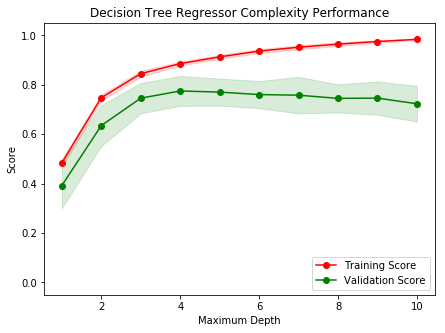

In [42]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance tradeoff
### Case 1 : max_depth = 1
#### --- In this case , the model suffers from high bias
#### --- We can easily detect this by looking at the testing and training curves
#### --- Since  there is very less gap or almost no gap between training and testing curves we can say that it has very high bias or we can also say that the model suffers from underfitting
#### --- This model does not generalises the data well
#### Case 2 : max_depth = 10
#### --- In this case , the model suffers from high variance
#### --- We can easily detect this by looking at the testing and training curves
#### --- Since there is a large gap between between both the curves , we can say that it high variance or overfitting
#### --- This model does not generalises the data well

### Best-Guess Optimal Model
#### The maximum depth of a model to be optimal can be 4.
#### This can fit the data well with out overfitting since the validation scores and the curves are more efficient in this case
#### There are not much concerning changes in the curves when we increase the depth to 4

### Evaluating Model Performance

### Grid Search
#### Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. It helps us to choose the best model for prediction

#### The Grid search optimises the hyperparameters by iteratively selecting the items from grid , calculates them and returns values.This functionality helped grid search to optimise the machine learning algorithm

### K-fold cross validation 
#### In K-fold cross validation , we divide the data into k buckets
#### Then the model will be trained k times.
#### Each time we train our model , one bucket will be testing set and remaining will be training set
#### Then we average the results to get a final model

### Benifits of K-fold cross validation
#### It is used to get a model which will give unbiased and less variant generalisation of new data
#### It can test the model, without using the test set.
#### We are able to get the optimised set of parameters for a learning algorithm
#### Without cross validation set , the grid search would still give parameters which make the model high variant or the model might not perform well

### Fitting a Model

In [55]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    max_range_list=[1,2,3,4,5,6,7,8,9,10]
    params = {'max_depth':max_range_list}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [56]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


### The max_depth is 4 . It is same as what we determined in question 6 . My guess is correct

### Predicting Selling Prices

In [57]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67



### Statistics for Boston housing dataset:

#### Minimum price:  105000 dollars
#### Maximum price:  1024800  dollars
#### Mean price:  454342.9447852761 dollars
#### Median price  : 438900.0 dollars
#### Standard deviation of prices:   165340.27765266784 dollars

### The Selling price for client1 is less and below the mean . It can be justified by the fact that it has more poverty and student-teacher ratio
### The Selling price for client2 is very low  . It is obvious since it has high poverty and  low 'RM' parameter with high Student-teacher ratio
### The Selling price for client3 is very high . It can be justified by the fact that it has high 'RM' factor with less poverty and less student ratio.

In [58]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Applicability

#### --Since the data is collected a long back , there might be many changes.
#### --The data that has been recorded should include all type of areas and all kind of people living with different cost of living
#### --The more the number of features , the better will be the model. There are only 3 features . We can add extra features like Water supply , pollution , crime rate , Transport facilities etc.
#### --Because of all the above factors , the model cannot be used or cannot be applicable.